In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import warnings
warnings.filterwarnings('ignore')

In [2]:
assessments = pd.read_csv('/content/drive/MyDrive/A_test/assessments.csv')
courses = pd.read_csv('/content/drive/MyDrive/A_test/courses.csv')
studentAssessment = pd.read_csv('/content/drive/MyDrive/A_test/studentAssessment.csv')
studentInfo = pd.read_csv('/content/drive/MyDrive/A_test/studentInfo.csv')
studentRegistration = pd.read_csv('/content/drive/MyDrive/A_test/studentRegistration.csv')
vle = pd.read_csv('/content/drive/MyDrive/A_test/vle.csv')
studentVle = pd.read_csv('/content/drive/MyDrive/A_test/studentVle.csv')


#Start with Student Information

In [3]:
df = pd.merge(studentInfo, studentRegistration,
             on=['code_module','code_presentation','id_student'],
             how='left')

#Add Course Metadata:

In [4]:
df = pd.merge(df, courses,
             on=['code_module','code_presentation'],
             how='left')

In [5]:
df.shape

(32593, 15)

#Add Assessment Data:

In [6]:
# First merge assessments with courses
course_assessments = pd.merge(courses, assessments,
                             on=['code_module','code_presentation'],
                             how='left')

In [7]:
# During the merge, explicitly manage suffixes
df = pd.merge(df,
              course_assessments,
              on=['code_module','code_presentation'],
              suffixes=('', '_assessments'),  # Key fix
              how='left')

# Keep only one version of the column
# Instead of using fillna, directly assign values from the new column
df['module_presentation_length'] = df['module_presentation_length_assessments']
df = df.drop(columns=['module_presentation_length_assessments'])
df.shape

(323925, 19)

#Add VLE Interactions:

In [8]:
# 3. Now merge student scores
df = pd.merge(df, studentAssessment,
             on=['id_assessment','id_student'],
             how='left')
df.shape

(323925, 22)

In [9]:
# First merge vle with studentVle
vle_interactions = pd.merge(vle, studentVle,
                           on=['id_site','code_module','code_presentation'],
                           how='inner')

# Aggregate clicks per student-course
vle_agg = vle_interactions.groupby(['code_module','code_presentation','id_student'])['sum_click'].sum().reset_index()

# Final merge
df = pd.merge(df, vle_agg,
             on=['code_module','code_presentation','id_student'],
             how='left')
df.shape

(323925, 23)

In [10]:
df.to_csv('/content/drive/MyDrive/A_test/final_student.csv', index=False)

final_df = pd.read_csv('/content/drive/MyDrive/A_test/final_student.csv')
final_df.shape

(323925, 23)

In [11]:
final_df.tail(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,sum_click
323920,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,...,NaN,269,37443,CMA,229.0,0.0,NaN,NaN,NaN,616.0
323921,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,...,NaN,269,37435,TMA,61.0,0.0,37.0,0.0,80.0,616.0
323922,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,...,NaN,269,37436,TMA,124.0,0.0,114.0,0.0,80.0,616.0
323923,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,...,NaN,269,37437,TMA,173.0,0.0,169.0,0.0,60.0,616.0
323924,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,...,NaN,269,37444,Exam,229.0,100.0,NaN,NaN,NaN,616.0


In [12]:
import pandas as pd
pd.set_option("display.max_columns", None)
final_df.tail(5)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,sum_click
323920,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,-28.0,NaN,269,37443,CMA,229.0,0.0,NaN,NaN,NaN,616.0
323921,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,-28.0,NaN,269,37435,TMA,61.0,0.0,37.0,0.0,80.0,616.0
323922,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,-28.0,NaN,269,37436,TMA,124.0,0.0,114.0,0.0,80.0,616.0
323923,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,-28.0,NaN,269,37437,TMA,173.0,0.0,169.0,0.0,60.0,616.0
323924,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,-28.0,NaN,269,37444,Exam,229.0,100.0,NaN,NaN,NaN,616.0


#PCA-optimized strategy
## Step 1: Handle Missing Values (Smart Imputation)

In [13]:
import numpy as np

# Assessment scores (missing = no attempt)
final_df['score'] = final_df['score'].fillna(0)

# Assessment dates (relative to course timeline)
final_df['date'] = final_df.groupby(['code_module', 'code_presentation'])['date'].transform(lambda x: x.fillna(x.median()))

# VLE interactions (missing = no clicks)
final_df['sum_click'] = final_df['sum_click'].fillna(0)

# Submission handling
final_df['date_submitted'] = final_df['date_submitted'].fillna(-1)
final_df['is_banked'] = final_df['is_banked'].fillna(0).astype(int)

# Socioeconomic imputation
final_df['imd_band'] = final_df['imd_band'].fillna(final_df['imd_band'].mode()[0])

# Registration missing
final_df['date_registration'] = final_df.groupby(['code_module', 'code_presentation'])['date_registration'] \
                                         .transform(lambda x: x.fillna(x.median()))

# Dropout status flag
final_df['dropped_out'] = np.where(final_df['date_unregistration'].isna(), 0, 1)
final_df = final_df.drop(columns=['date_unregistration'])


In [14]:
final_df.shape

(323925, 23)

##  Step 2: Date Feature Engineering

In [15]:
#Convert raw dates into meaningful numerical features:

final_df['days_to_assessment'] = final_df['date'] - final_df['date_registration']
final_df['submission_delay'] = final_df['date_submitted'] - final_df['date']
final_df['submission_delay'] = final_df['submission_delay'].apply(lambda x: x if x >= 0 else 0)
final_df = final_df.drop(columns=['date', 'date_submitted', 'date_registration'])


## Step 3: Encode Categorical Features
. Frequency encode high-cardinality features

. One-hot encode nominal categorical columns

In [16]:
# Frequency encode 'region'
final_df['region_freq'] = final_df['region'].map(final_df['region'].value_counts(normalize=True))
final_df = final_df.drop(columns=['region'])

# One-hot encode other categoricals
cat_cols = ['gender', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result']
final_df = pd.get_dummies(final_df, columns=cat_cols, drop_first=True)
final_df.shape

(323925, 36)

##  Step 4: Drop Non-Feature Columns
. Remove IDs and other non-useful columns for PCA:

In [17]:
drop_cols = ['code_module', 'code_presentation', 'id_student', 'id_assessment', 'assessment_type']
final_df_clean = final_df.drop(columns=drop_cols)
print(final_df.shape)
print(final_df_clean.shape)

(323925, 36)
(323925, 31)


## Step 5: Scale Continuous Features
. Use StandardScaler to scale only continuous numeric columns:

In [18]:
from sklearn.preprocessing import StandardScaler

continuous_cols = ['score', 'sum_click', 'days_to_assessment', 'submission_delay', 'module_presentation_length']
scaler = StandardScaler()
scaled_continuous = scaler.fit_transform(final_df_clean[continuous_cols])

# Combine with the rest
df_encoded = final_df_clean.drop(columns=continuous_cols)
X_final = np.hstack([scaled_continuous, df_encoded.values])


In [19]:
print(final_df.shape)
print(final_df_clean.shape)
print(X_final.shape)

(323925, 36)
(323925, 31)
(323925, 31)


In [37]:
print(final_df.columns)


Index(['code_module', 'code_presentation', 'id_student',
       'num_of_prev_attempts', 'studied_credits', 'module_presentation_length',
       'id_assessment', 'assessment_type', 'weight', 'is_banked', 'score',
       'sum_click', 'dropped_out', 'days_to_assessment', 'submission_delay',
       'region_freq', 'gender_M', 'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 'age_band_35-55',
       'age_band_55<=', 'disability_Y', 'final_result_Fail',
       'final_result_Pass', 'final_result_Withdrawn'],
      dtype='object')


## Step 6: Apply PCA

In [20]:
# Apply PCA
from sklearn.decomposition import PCA # Import the PCA class
import numpy as np # Import numpy for cumsum
# PCA with 95% explained variance
#pca = PCA()
#X_pca = pca.fit_transform(X_final)
#explained_variance = np.cumsum(pca.explained_variance_ratio_)






In [26]:
from sklearn.decomposition import PCA

# PCA with 95% explained variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_final)

print("Original shape:", X_final.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (323925, 31)
Reduced shape: (323925, 2)


In [27]:
pca_df = pd.DataFrame(X_pca)
pca_df.to_csv('/content/drive/MyDrive/A_test/final_student_pca_1.csv', index=False)


In [28]:
pca_data = pd.read_csv('/content/drive/MyDrive/A_test/final_student_pca_1.csv')
pca_data.shape

(323925, 2)

In [38]:
print(pca.explained_variance_ratio_.cumsum())
# Should output [0.XX, 0.95] if n_components=2 truly captures 95%

[0.65477806 0.99710129]


In [39]:
# Scale ALL features (including dummies) since PCA is variance-sensitive
scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)  # Entire feature matrix

Text(0, 0.5, 'Cumulative Explained Variance')

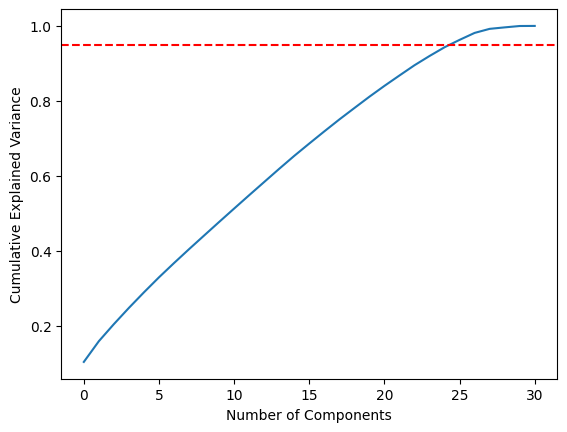

In [41]:
pca = PCA().fit(X_final_scaled)  # Fit to standardized data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.95, color='red', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [30]:
pca_data.head(5)

,0,1
0,158.815681,-11.519079
1,158.865576,-1.520612
2,158.866364,-1.517479
3,158.866351,-1.517195
4,158.917048,8.484121


In [35]:
def get_final_result(row):
    if row['final_result_Fail'] == 1:
        return 'Fail'
    elif row['final_result_Pass'] == 1:
        return 'Pass'
    elif row['final_result_Withdrawn'] == 1:
        return 'Withdrawn'
    else:
        return 'Distinction'  # In case it was dropped from dummy encoding

final_result = df_encoded[['final_result_Fail', 'final_result_Pass', 'final_result_Withdrawn']].apply(get_final_result, axis=1)


In [36]:
import pandas as pd

# Wrap with column names like PC1, PC2, ...
pca_df_1 = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Optional: include target label (e.g., final_result) for analysis
pca_df_1['final_result'] = final_df['final_result']
pca_df_1.head(5)

KeyError: 'final_result'

In [29]:
# prompt: Now apply ensembling technique on it

import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'final_result' is your target variable
y = final_df['final_result']
X = pca_data  # Use the PCA-transformed data

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Evaluate individual models
rf_accuracy = accuracy_score(y_test, rf_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}")


# Ensembling: Averaging probabilities (for classification)
rf_probs = rf_model.predict_proba(X_test)
gb_probs = gb_model.predict_proba(X_test)

ensemble_probs = (rf_probs + gb_probs) / 2
ensemble_predictions = np.argmax(ensemble_probs, axis=1) # Get class with highest probability

# Evaluate ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy}")


KeyError: 'final_result'

In [21]:
# Choosing optimal number of components (retain 95% variance)
#k = np.argmax(explained_variance >= 0.95) + 1
#print(f"Optimal number of components: {k}")


In [22]:
# Reduce dimensions using optimal components
#pca = PCA(n_components=k)
#principal_components = pca.fit_transform(X_final)
#print("Original shape:", X_final.shape)
#print("Reduced shape:", X_pca.shape)


In [23]:
#save the PCA-transformed data:


#pca_df = pd.DataFrame(principal_components)
#pca_df.to_csv('/content/drive/MyDrive/A_test/final_student_pca.csv', index=False)
#pca_df.shape

In [24]:
#pca_df.head(5)

In [25]:
# Visualize PCA components:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

NameError: name 'pca' is not defined